## How to Create a Component from a GDSII file

Sometimes it will be necessary to import a gds file into gdsfactory. This can happen if you have created a geometry using some other software, such as meep, and you would like the use the geometry in gdsfactory. While gdsfactory has built in functions to do some portions of the process, there are several other steps that are necessary. 

The purpose of this notebook is to demonstrate the steps needed to create a complete gdsfactory component from a gds file.

 

For this example, I'll be using a gds of a splitter that was designed in Meep. 

This is an picture of the gds we will convert to a component:
![Image of splitter file](https://raw.githubusercontent.com/BYUCamachoLab/Photonics-Bootcamp/main/book/images/Notebook_Images/compFromGdsTutorial1.png)

Here we go!

We'll just be using gdsfactory here, so we'll include that at the top, and also make a variable to hold the path to the gds file. In our case, that will be "splitter1x2"

In [1]:
import gdsfactory as gf # We'll just be using gdsfactory here

fname = "splitter1x2.gds" # The filename/path of the gds

Our first step is to get the geometry from the gds file and create a component with that geometry.

2023-03-16 12:20:14.991 | WARNING  | gdsfactory.pdk:get_active_pdk:561 - No active PDK. Activating generic PDK.



You can install `pip install gdsfactory[full]` for better visualization


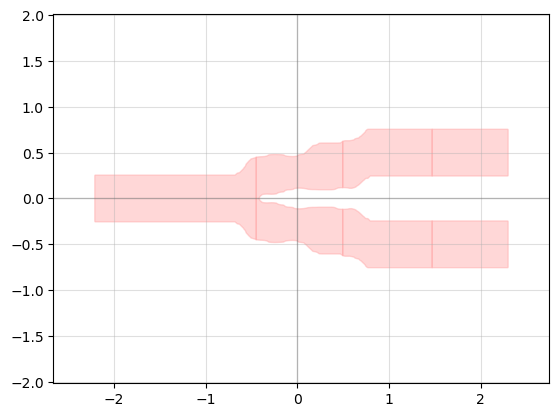

.: uid ae6bc0e5, ports [], references ['boolean_e75acdba_1'], 0 polygons


In [2]:
# Create a component with the same name as our gds
c = gf.Component(name=fname[len(fname)-4]) 

# Add the geometry from the gds as a reference to our component
splitter = c << gf.read.import_gds(fname)

# Show the component
c 

Now we have a geometry, but in order to use it in gdsfactory, we need ports. Since our original gds did not have any ports, we must add them now. 

You can install `pip install gdsfactory[full]` for better visualization


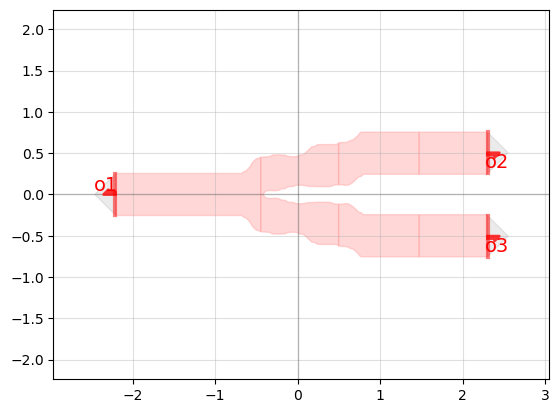

.: uid ae6bc0e5, ports ['o1', 'o2', 'o3'], references ['boolean_e75acdba_1'], 0 polygons


In [3]:
# bbox is the bounding box of the component. 
# It stores the lower left and the upper right corners of the component in a 2D array
box = c.bbox 

# Find the middle y value
yMid = (box[1,1] - box[0,1])/2 + box[0,1]

# Add ports. 
c.add_port("o1", center=(box[0,0],yMid), orientation=180, width=0.5, layer=(1,0)) # adds the input port with the name "o1" It must be oriented 180 so it points out of the component
c.add_port("o2", center=(box[1,0],box[1,1]-0.25), orientation=0, width=0.5, layer=(1,0)) # adds the upper output port with name "o2"
c.add_port("o3", center=(box[1,0],box[0,1]+0.25), orientation=0, width=0.5, layer=(1,0)) # adds the lower output port with name "o3"

c


And there you go! 

## References